# OpenCl application walkthrough - Matrix Multiplication

Often it is helpful to see a complete example that is fully explained in every detail. Matrix multiplication is a commonly employed compute operation and we can use it for a complete example with OpenCL. 

The source code for the example is in [mat_mult.cpp](mat_mult.cpp) click on the link and open up the file



## Write out the matrices

In [25]:
import numpy as np

from matplotlib import pyplot as plt

%matplotlib widget

# A is of size (NROWS_C, NCOLS_A)
# B is of size (NCOLS_A, NCOLS_C)    
# C is of size (NROWS_C, NCOLS_C)

NCOLS_A = 1024
NROWS_C = 1024
NCOLS_C = 1024

# Data type
dtype = np.float32

# Make up the arrays A, B, and C
A = np.random.random(size = (NROWS_C, NCOLS_A)).astype(dtype)
B = np.random.random(size = (NCOLS_A, NCOLS_C)).astype(dtype)

# Make up the answer
C = np.matmul(A, B, dtype = dtype)

# Write out the array as binary files
A.tofile("array_A.dat")
B.tofile("array_B.dat")
C.tofile("array_C_answer.dat")

## Run the program

In [28]:
!make; ./mat_mult.exe

make: Nothing to be done for `all'.
	               name: Intel(R) Core(TM) i7-4850HQ CPU @ 2.30GHz 
	 global memory size: 17179 MB
	    max buffer size: 4294 MB
RMS difference is 0.000113535
Elapsed time is 0.9591seconds


## Read in the answer and make a comparison

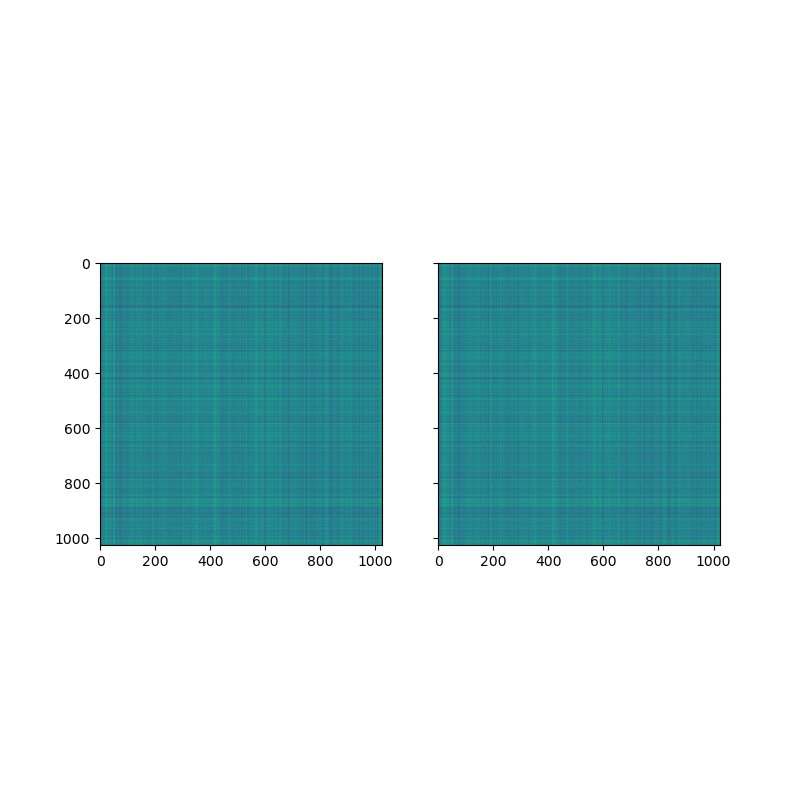

In [29]:
# Read in the output from OpenCL
C_ocl = np.fromfile("array_C.dat", dtype=dtype).reshape((NROWS_C, NCOLS_C))

# Make plots
fig, ax = plt.subplots(1, 2, figsize=(8,8), sharex=True, sharey=True)

ax[0].imshow(C)
ax[1].imshow(C_ocl)

plt.show()

